# Anomaly Detection & Visuals

Run anomaly detection, then explore the anomalies with simple visuals from `mlarena` package. 

In [0]:
# Third-party imports
import numpy as np
import pandas as pd
import mlflow
from sklearn.ensemble import IsolationForest
from mlarena import PreProcessor
import mlarena.utils.plot_utils as put

# Local application imports
import de_utils as dut

#Load Data

In [0]:
df = spark.sql("SELECT * FROM bupa_call_synthetic_dataset_with_sentiment_score").toPandas()

In [0]:
col_of_interest = ['AppTag', 'NPS', 'NCR', 'average_score', 'first_chunk_score', 'last_chunk_score', 'average_score']
X = df[col_of_interest]


# Anomaly Detection

In [0]:
# data preprocessing
preprocessor = PreProcessor(drop='if_binary')
X_transformed = preprocessor.fit_transform(X)
# anomaly detection with Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_transformed)
y_pred = clf.predict(X_transformed)
y_pred = np.where(y_pred==-1,1,0)  #(-1 = anomaly, 1 = normal)
scores = clf.decision_function(X_transformed) 

# Compare Anomaly vs Rest

## Scores of the Anomaly vs Rest

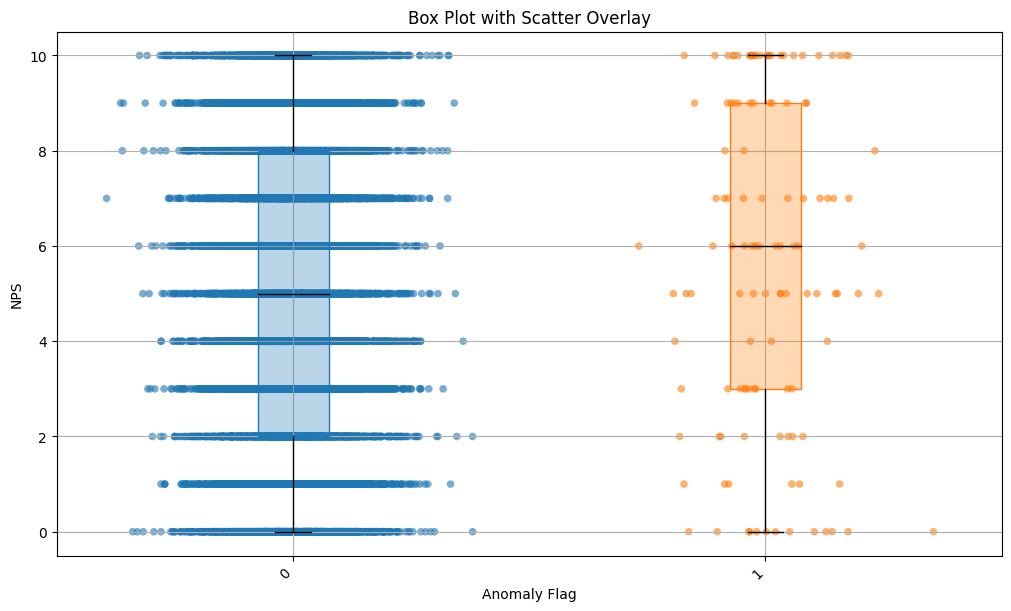

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='NPS', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag")

In [0]:
display(summary_table)

AnomalyFlag,n,mean,median,sd
0,11880,5.035942760942761,5.0,3.166263632864539
1,120,5.7,6.0,3.433889433085385


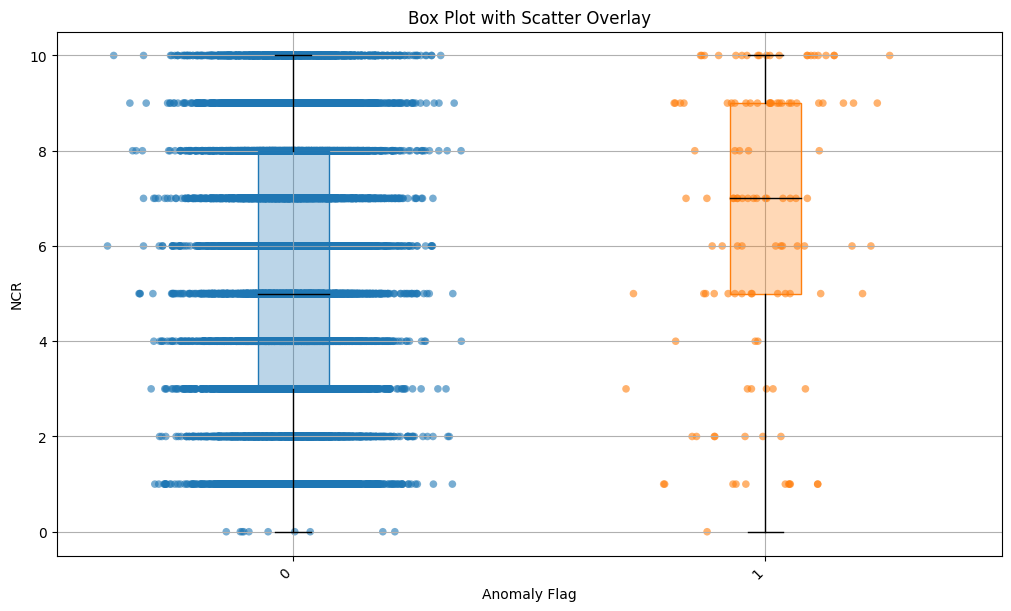

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='NCR', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag")

## Sentiment of the Anomaly vs Rest

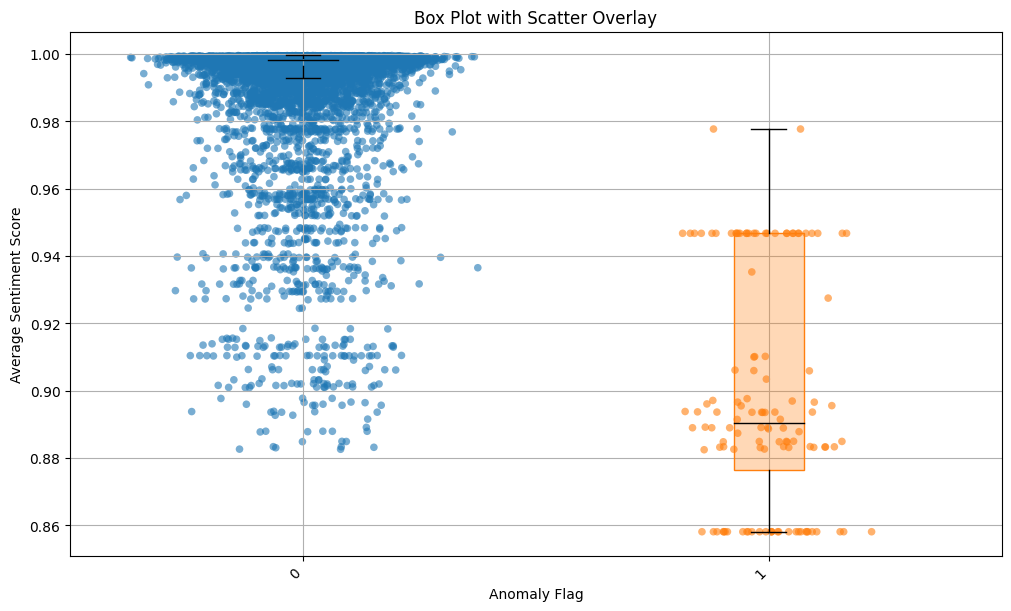

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='average_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "Average Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag,n,mean,median,sd
0,11880,0.9937022398345118,0.9982261214999999,0.014542871785669756
1,120,0.8989650556583333,0.890325755,0.034273409703118624


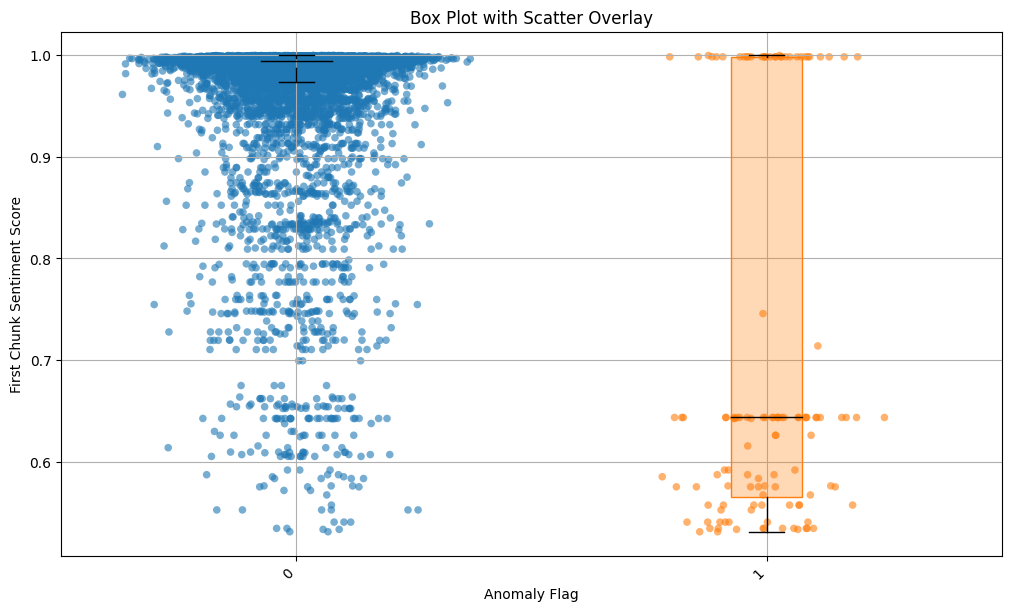

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='first_chunk_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "First Chunk Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag,n,mean,median,sd
0,11880,0.9764258150315657,0.994415641,0.058118181982987877
1,120,0.7038290397416667,0.643704355,0.18315304761536122


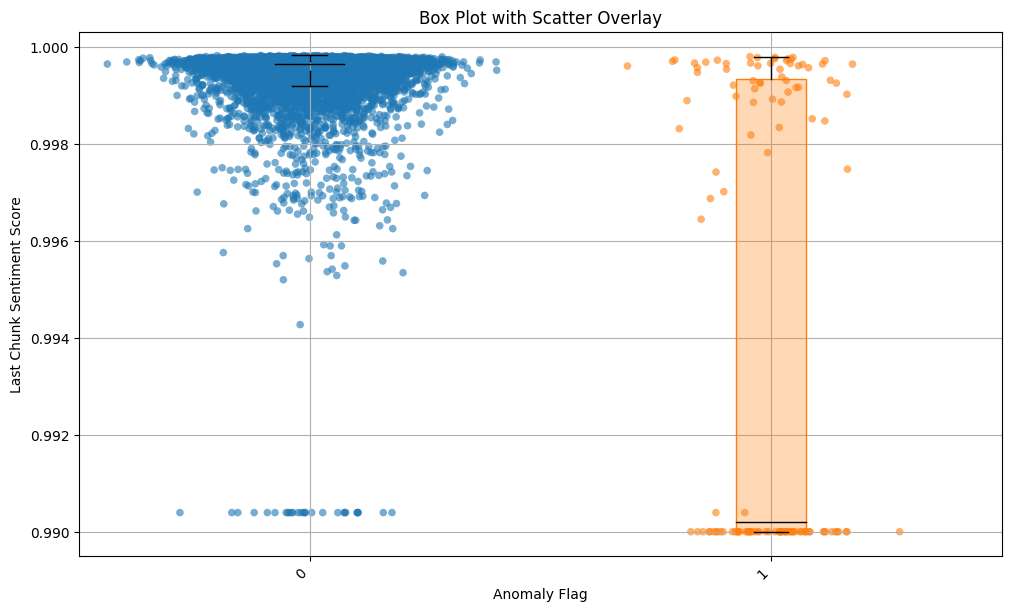

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='last_chunk_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "Last Chunk Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag,n,mean,median,sd
0,11880,0.9994974149602693,0.999644518,6.020740994060249E-4
1,120,0.9944270842416667,0.9902057645,0.004607861936179687


# Comparisons across Topics

## Scores across Topic with Anomaly Highlighted


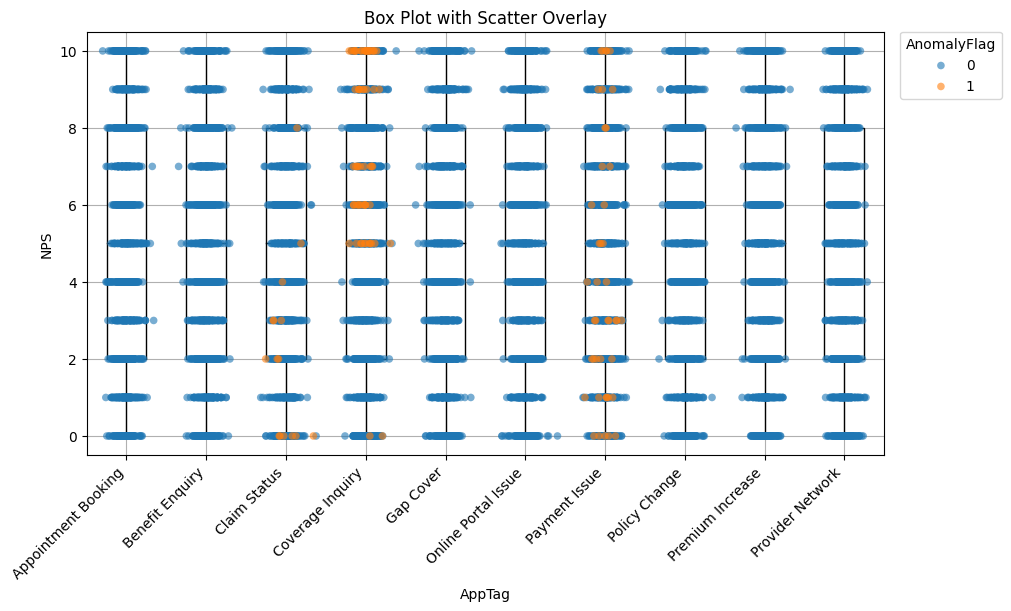

In [0]:
score = 'NPS' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

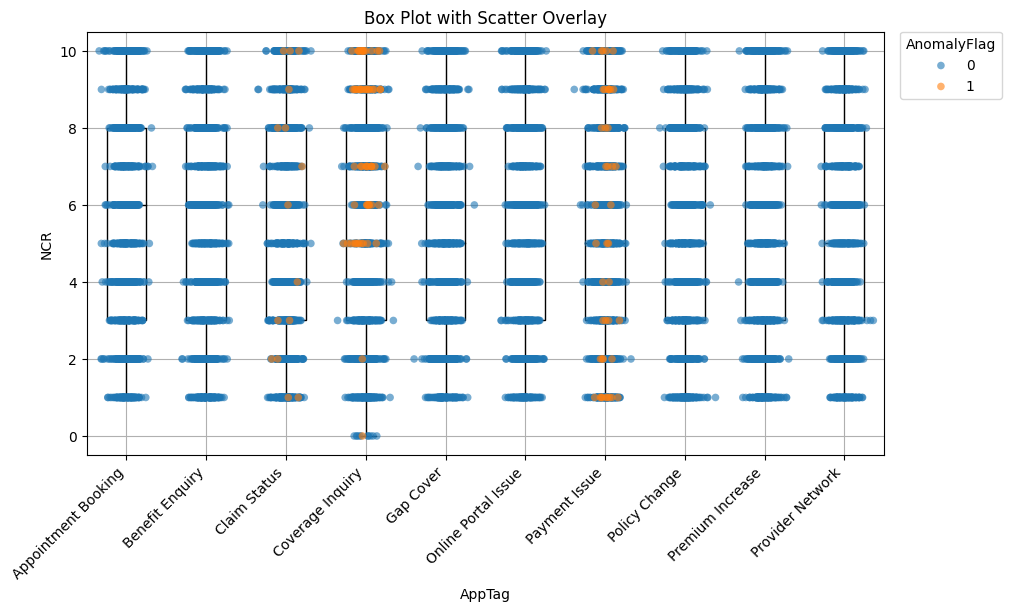

In [0]:
score = 'NCR' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

## Sentiment across Topic with Anomaly Highlighted

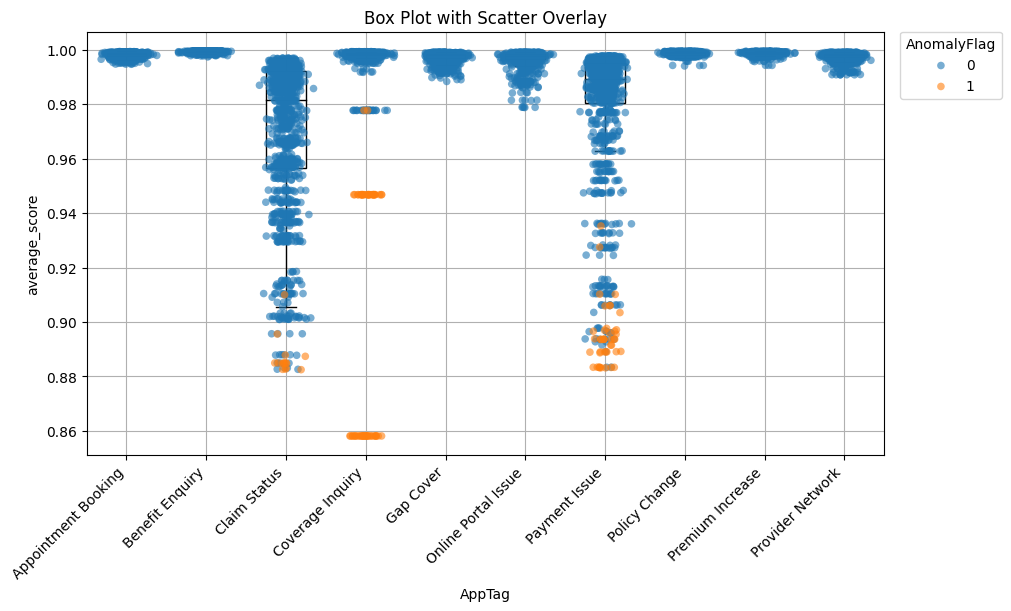

In [0]:
score = 'average_score' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')


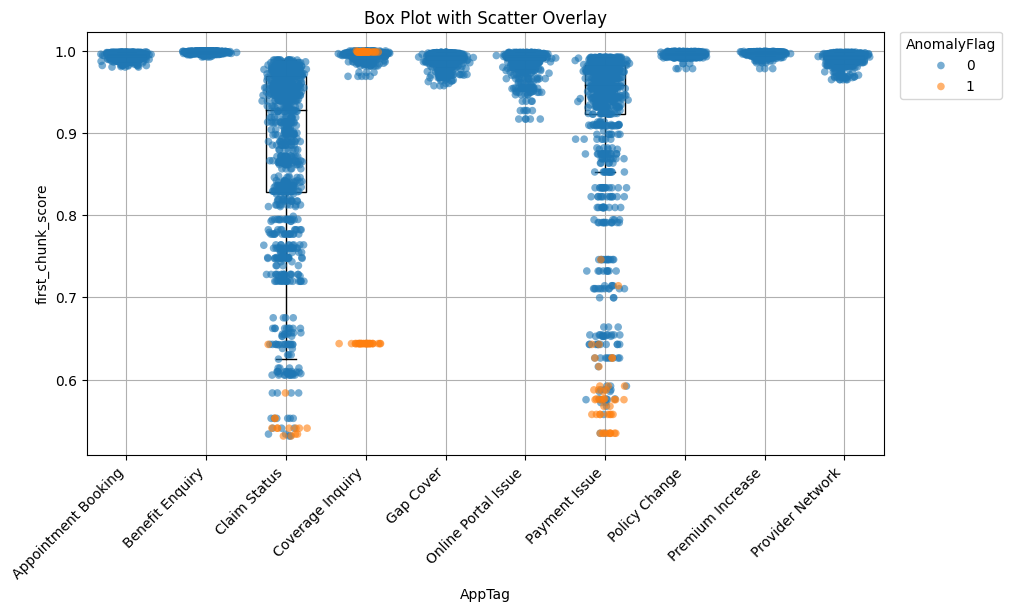

In [0]:
score = 'first_chunk_score' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

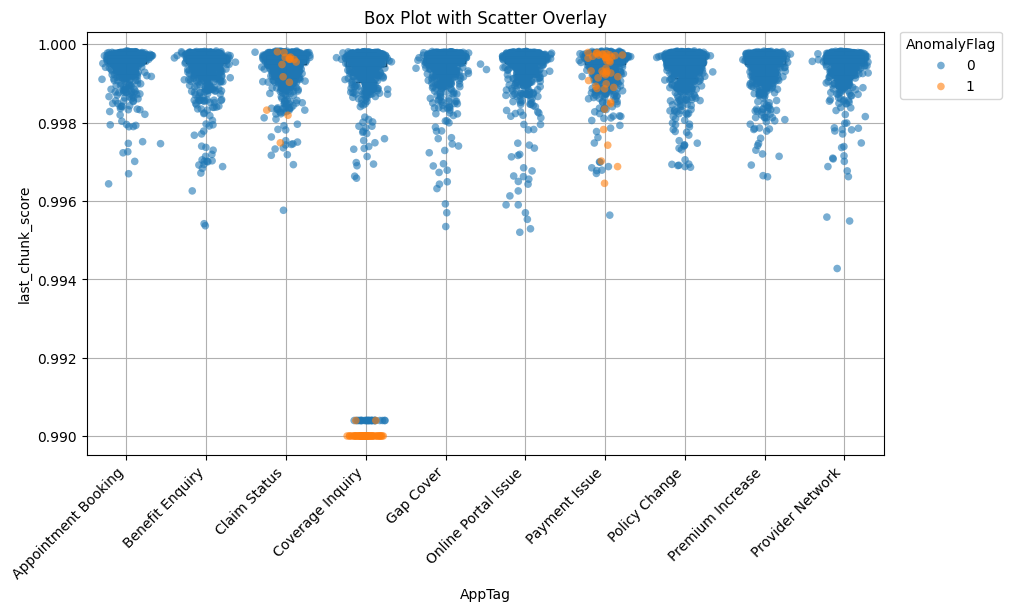

In [0]:
score = 'last_chunk_score'  
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

# 6. Changes Over Time

## Proportions of Anomaly Hilighted over Time

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Time Series Stacked Bar Chart'}, xlabel='Hour', ylabel='Percentage'>)

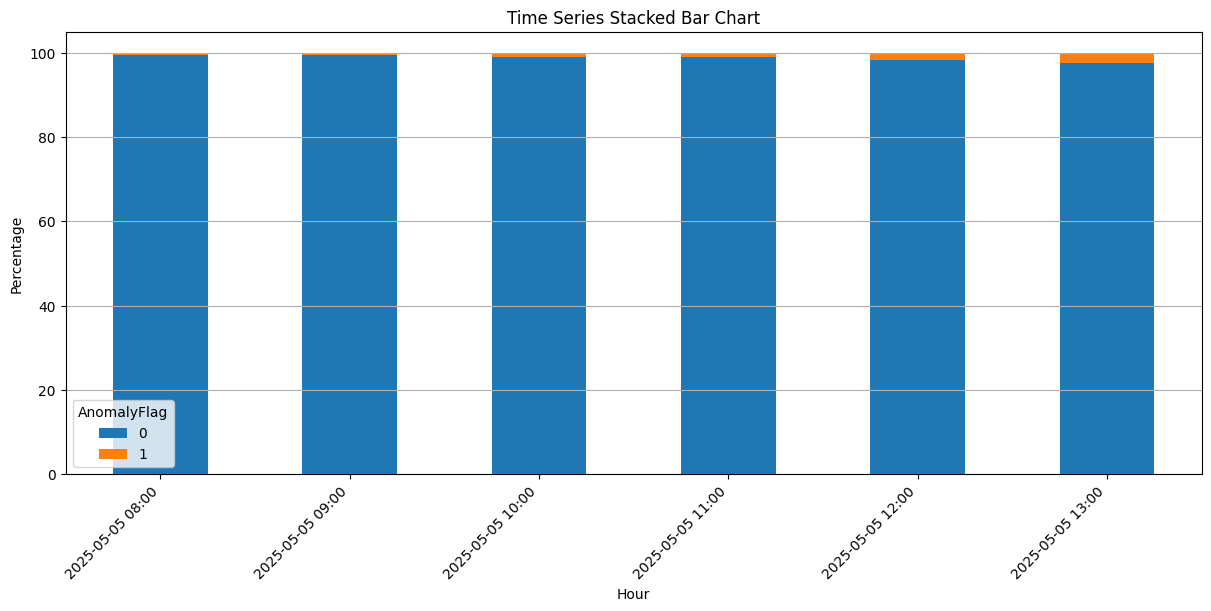

In [0]:
put.plot_stacked_bar_over_time(data=df, x= "DatetimeStamp", y = "AnomalyFlag",
                               freq = "h", is_pct = True)

## Distribution of Scores with Anomaly Hilighted over Time

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution Over Time'}, xlabel='Hour', ylabel='NPS'>)

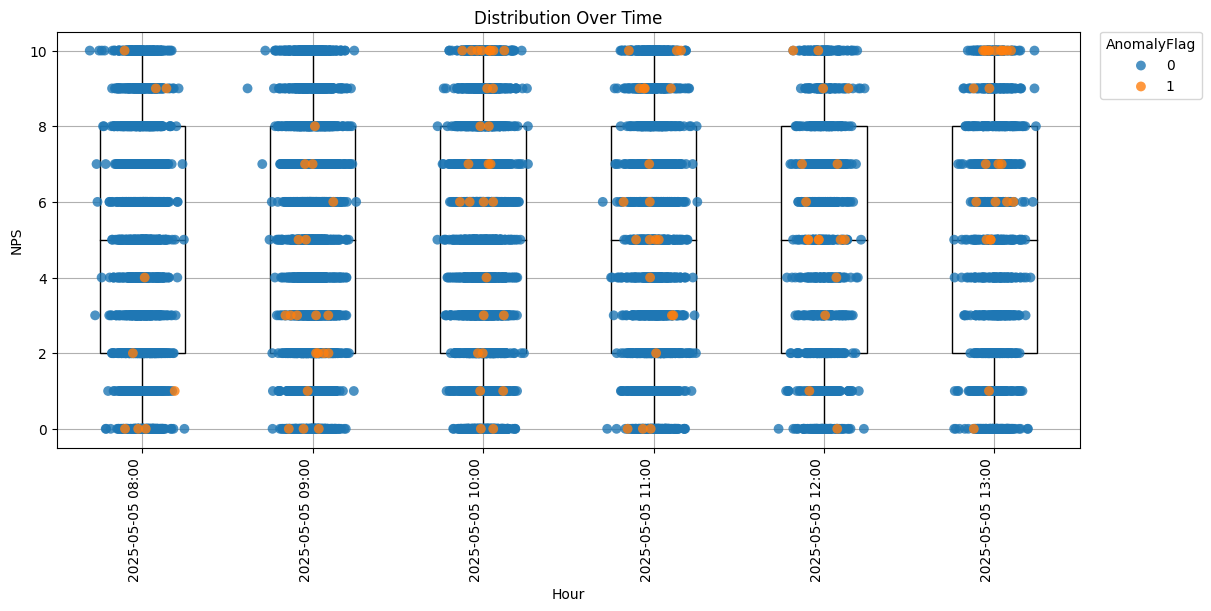

In [0]:
metric = 'NPS'
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution Over Time'}, xlabel='Hour', ylabel='NCR'>)

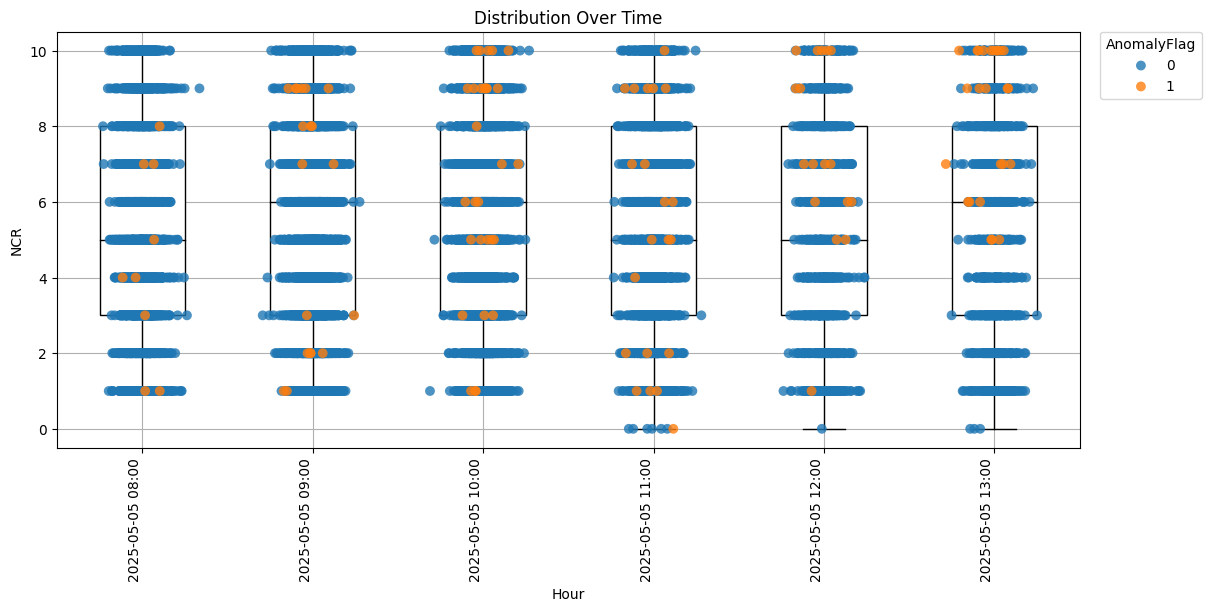

In [0]:
metric = 'NCR'
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                freq = 'h', point_hue = 'AnomalyFlag')

## Distribution of Sentiment with Anomaly Hilighted over Time


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'First Chunk Sentiment Trend'}, xlabel='Hour', ylabel='First Chunk Sentiment'>)

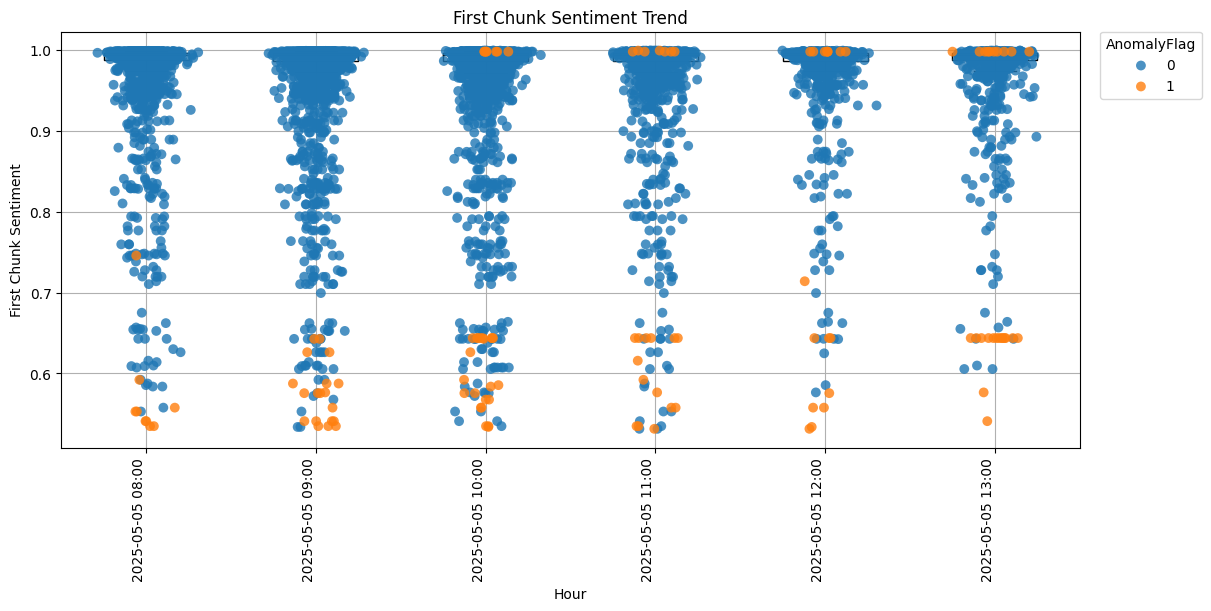

In [0]:
metric = 'first_chunk_score'
metric_print = "First Chunk Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Last Chunk Sentiment Trend'}, xlabel='Hour', ylabel='Last Chunk Sentiment'>)

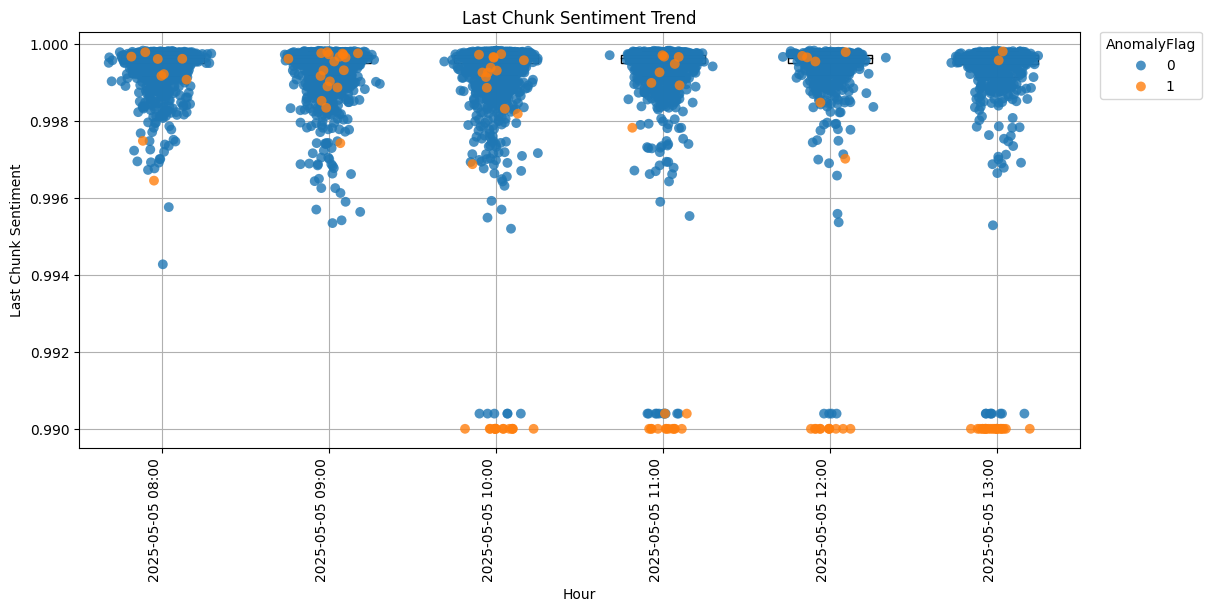

In [0]:
metric = 'last_chunk_score'
metric_print = "Last Chunk Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Overall Sentiment Trend'}, xlabel='Hour', ylabel='Overall Sentiment'>)

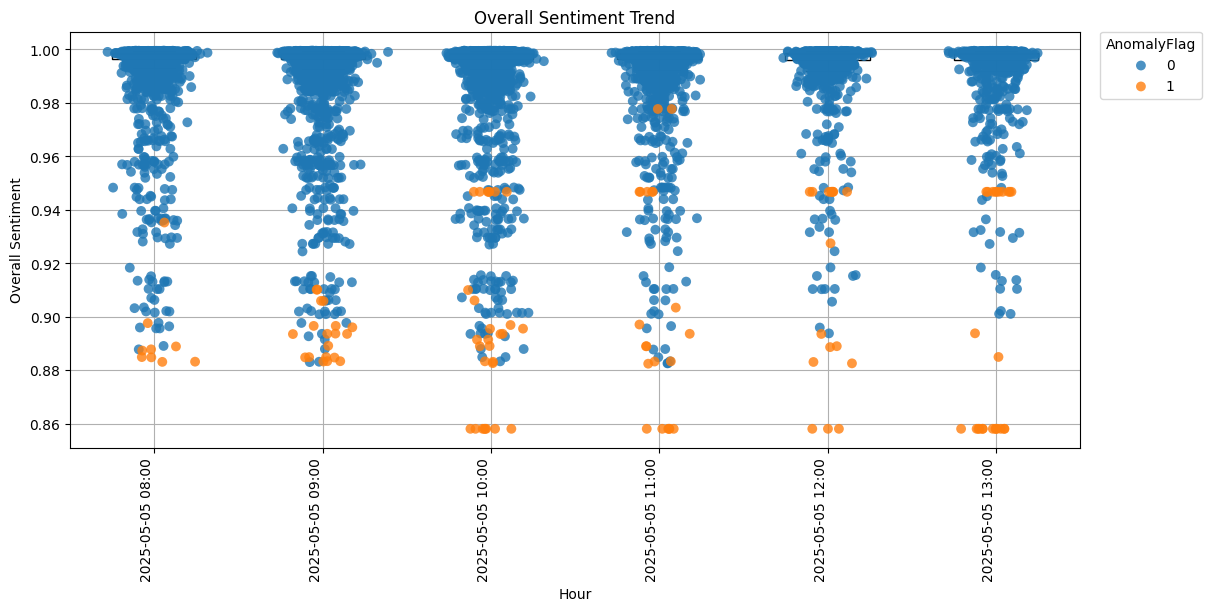

In [0]:
metric = 'average_score'
metric_print = "Overall Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')